In [1]:
import pandas as pd
import numpy as np

In [3]:
data = {
    'Mother Height' : [58,62,60,64,67,70],
    'Daughter Height' : [60,60,58,60,70,72]
       }
df = pd.DataFrame(data)
df.to_csv('data.csv',index = False)

In [4]:
def Error(y_pred , y):
    error = (1/(2*y.shape[0])) * np.sum(np.square(y - y_pred))
    return error

In [5]:
def GradientDescent(X,y,y_pred,w,b,alpha):
    m = X.shape[0]
    dw = (1/m) * np.sum((y_pred - y)*X)
    db = (1/m) * np.sum((y_pred - y))
    w = w - alpha*dw
    b = b - alpha*db
    return w , b

In [6]:
import matplotlib.pyplot as plt
def linear_regression_gradient_descent(X, y, alpha, num_epochs):
    m = X.shape[0]
    w = 0
    b = 0
    
    errors = []
    
    for epoch in range(num_epochs):
        y_pred = X.dot(w) + b
        error = Error(y_pred, y)
        print(error)
        errors.append(error)
        w , b = GradientDescent(X , y, y_pred, w, b, alpha)
    plt.plot(range(num_epochs), errors)
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('Error over Epochs')
    plt.show()
    y_pred = X.dot(w) + b
    return y_pred,w,b

In [7]:
def compute_MSE_RMSE(y,y_pred):
    mse = np.mean(np.square(y - y_pred))
    rmse = np.sqrt(mse)
    print(f"MSE = {mse}")
    print(f"RMSE = {rmse}")

In [8]:
X = df['Mother Height'].values
y = df['Daughter Height'].values
print(X.shape[0])
print(y.shape[0])

6
6


2020.6666666666665
717.6110418726851
256.270294839783
92.93476181755389
35.10658042224394
14.632783191929322
7.384130890663112
4.817779269867973
3.9091742960820746
3.587486765922332
3.4735946104383206
3.433271435064942
3.4189950128639213


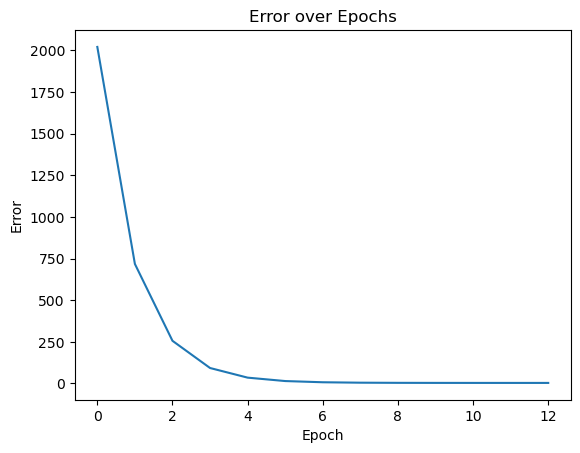

w = 0.9968158460197014
b = 0.015562975661265471
MSE = 6.82788064349717
RMSE = 2.6130213630005343


In [9]:
y_pred,w,b = linear_regression_gradient_descent(X,y,0.0001,13)
print(f"w = {w}")
print(f"b = {b}")
compute_MSE_RMSE(y,y_pred)

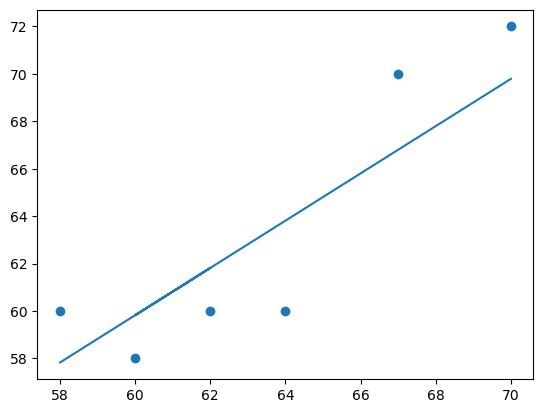

In [10]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [11]:
p = 63
q = p*w + b
print(q)

62.81496127490246


## Q2

In [12]:
data = {
    'hours':[1,2,3,4,5,6,7,8],
    'pass':[0,0,0,0,1,1,1,1]
}
df = pd.DataFrame(data)
df.to_csv('pass.csv',index=False)

In [13]:
def Error_Logistic(y , y_pred):
    m = y.shape[0]
    cost = - (1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

In [15]:
def Sigmoid(z):
    y_pred = 1/(1 + np.exp(-z))
    return y_pred

In [28]:
def Gradient_Descent(y,y_pred,X,w,b,alpha):
    m = y.shape[0]
    dw = (1 / m) * np.sum((y_pred - y) * X)
    db = (1 / m) * np.sum(y_pred - y)
    w = w - alpha*dw
    b = b - alpha*db
    return w , b

In [54]:
def Logistic_regression(X,y,alpha,epochs):
    w = 0
    b = 0
    errors = []
    for i in range(1,epochs+1):
        z = w*X + b
        y_pred = Sigmoid(z)
        error = Error_Logistic(y , y_pred)
        if (i % 100 == 0):
            print(error," at ",i)
        
        errors.append(error)
        w, b = Gradient_Descent(y,y_pred,X,w,b,alpha)
    plt.plot(range(epochs), errors)
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('Error over Epochs')
    plt.show()
    y_pred = X.dot(w) + b
    return Sigmoid(w * X + b),w,b 

8
8
0.187878235262057  at  100
0.13792694396650185  at  200
0.1150625810278081  at  300
0.10101117635596218  at  400
0.09113141919565701  at  500
0.08362904231750917  at  600
0.07764240590591574  at  700
0.07269785958276415  at  800
0.06850966068146015  at  900
0.0648932737077221  at  1000
0.06172314425149466  at  1100
0.05891025169331121  at  1200
0.05638933306653281  at  1300
0.05411120139549563  at  1400
0.05203791409075807  at  1500


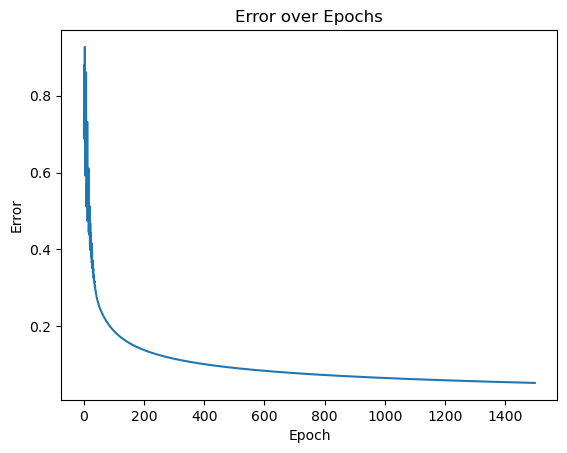

8
8


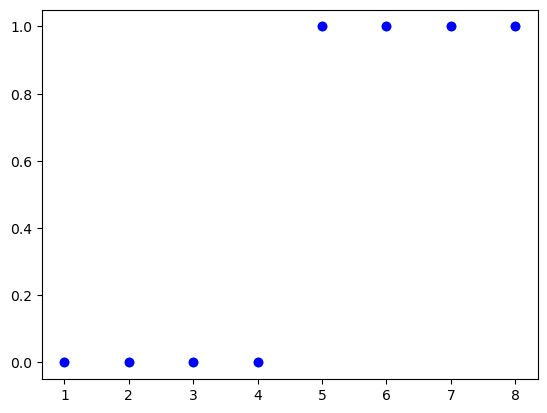

In [58]:
X = df['hours'].values
y = df['pass'].values
print(X.shape[0])
print(y.shape[0])
y_pred,w,b = Logistic_regression(X,y,0.6,1500)
print(len(y_pred))
for i in range(len(y_pred)):
    if (y_pred[i]>=0.5):
        y_pred[i] = 1
    else:
        y_pred[i] = 0
print(len(y_pred))
plt.scatter(X,y)
plt.scatter(X,y_pred,color='blue')

## Q3

In [1]:
import numpy as np
import pandas as pd

data = {
    'X1': [4, 2, 1, 3, 1,6],
    'X2': [1, 8, 0, 2, 4,7],
    'Y': [1, 0, 1, 0, 0 , 0]
}
df = pd.DataFrame(data)

X = df[['X1', 'X2']].values
Y = df['Y'].values

X = np.c_[np.ones(X.shape[0]), X]

def initialize_parameters(n_features):
    return np.zeros(n_features)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, Y, theta):
    m = len(Y)
    predictions = sigmoid(np.dot(X, theta))
    cost = (-1/m) * (np.dot(Y, np.log(predictions)) + np.dot((1 - Y), np.log(1 - predictions)))
    return cost

def gradient_descent(X, Y, theta, learning_rate, num_iterations):
    m = len(Y)
    costs = []
    for _ in range(num_iterations):
        predictions = sigmoid(np.dot(X, theta))
        gradient = (1/m) * np.dot(X.T, (predictions - Y))
        theta -= learning_rate * gradient
        cost = compute_cost(X, Y, theta)
        costs.append(cost)
    return theta, costs

learning_rate = 0.1
num_iterations = 100


n_features = X.shape[1]
theta = initialize_parameters(n_features)

theta, costs = gradient_descent(X, Y, theta, learning_rate, num_iterations)

def predict(X, theta):
    probabilities = sigmoid(np.dot(X, theta))
    return [1 if p >= 0.5 else 0 for p in probabilities]

predictions = predict(X, theta)

accuracy = np.mean(predictions == Y)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Learned Parameters (Theta):", theta)
print(0.3902 + 3*0.6094 -2*1.5029)

Model Accuracy: 100.00%
Learned Parameters (Theta): [ 0.39021859  0.60946329 -1.5029822 ]
-0.7873999999999994
